<a href="https://colab.research.google.com/github/EdwinTinajero/Fundamentos-De-Programacion/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos originales:

    Estudiante  Edad   TipoRopa  Frecuencia
0            1    15  Deportiva           9
1            2    17  Deportiva           8
2            3    20     Formal           3
3            4    23  Deportiva           7
4            5    25     Formal           2
5            6    16  Deportiva           9
6            7    19     Formal           4
7            8    21  Deportiva           8
8            9    24     Formal           3
9           10    18  Deportiva          10
10          11    26     Formal           2
11          12    22  Deportiva           7
12          13    19     Formal           4
13          14    17  Deportiva           8
14          15    22     Formal           3
15          16    20  Deportiva           9
16          17    23     Formal           4
17          18    18  Deportiva          10
18          19    25     Formal           3
19          20    21  Deportiva           8

Resultados del clustering:

    Estudiante  Edad   TipoR

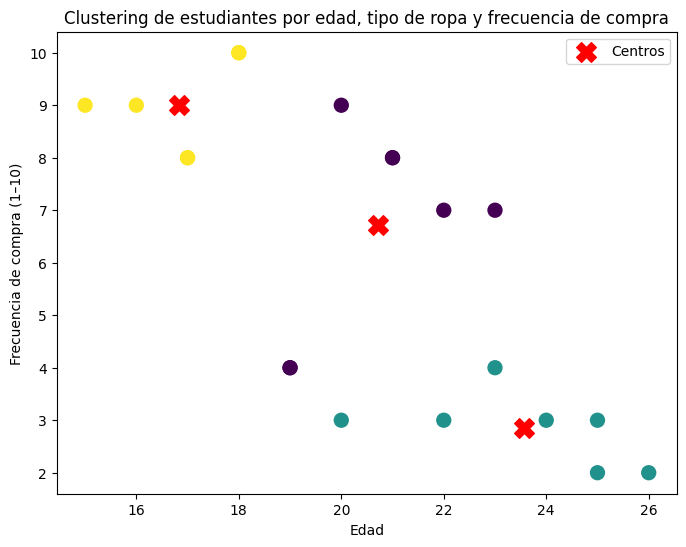


=== Análisis de cada cluster ===

Cluster 0:
    Estudiante  Edad   TipoRopa  Frecuencia
3            4    23  Deportiva           7
6            7    19     Formal           4
7            8    21  Deportiva           8
11          12    22  Deportiva           7
12          13    19     Formal           4
15          16    20  Deportiva           9
19          20    21  Deportiva           8
Promedio edad: 20.7
Promedio frecuencia: 6.7

Cluster 1:
    Estudiante  Edad TipoRopa  Frecuencia
2            3    20   Formal           3
4            5    25   Formal           2
8            9    24   Formal           3
10          11    26   Formal           2
14          15    22   Formal           3
16          17    23   Formal           4
18          19    25   Formal           3
Promedio edad: 23.6
Promedio frecuencia: 2.9

Cluster 2:
    Estudiante  Edad   TipoRopa  Frecuencia
0            1    15  Deportiva           9
1            2    17  Deportiva           8
5            6    16

In [ ]:
# ==========================================
# CLUSTERING DE ESTUDIANTES - TAREA UNIVERSITARIA
# ==========================================

# 1. Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ==========================================
# 2. Crear el DataFrame con los datos
# ==========================================
data = {
    "Estudiante": list(range(1, 21)),
    "Edad": [15,17,20,23,25,16,19,21,24,18,26,22,19,17,22,20,23,18,25,21],
    "TipoRopa": [
        "Deportiva","Deportiva","Formal","Deportiva","Formal",
        "Deportiva","Formal","Deportiva","Formal","Deportiva",
        "Formal","Deportiva","Formal","Deportiva","Formal",
        "Deportiva","Formal","Deportiva","Formal","Deportiva"
    ],
    "Frecuencia": [9,8,3,7,2,9,4,8,3,10,2,7,4,8,3,9,4,10,3,8]
}

df = pd.DataFrame(data)
print("Datos originales:\n")
print(df)

# ==========================================
# 3. Convertir variable categórica a numérica
# ==========================================
df["TipoRopa_num"] = df["TipoRopa"].map({"Deportiva": 0, "Formal": 1})

# ==========================================
# 4. Aplicar K-Means (agruparemos en 3 clusters)
# ==========================================
X = df[["Edad", "TipoRopa_num", "Frecuencia"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Mostrar resultados del clustering
print("\nResultados del clustering:\n")
print(df)

# ==========================================
# 5. Visualización del clustering
# ==========================================
plt.figure(figsize=(8,6))
plt.scatter(df["Edad"], df["Frecuencia"], c=df["Cluster"], cmap="viridis", s=100)
plt.xlabel("Edad")
plt.ylabel("Frecuencia de compra (1–10)")
plt.title("Clustering de estudiantes por edad, tipo de ropa y frecuencia de compra")

# Marcar los centros de los clusters
centros = kmeans.cluster_centers_
plt.scatter(centros[:,0], centros[:,2], c='red', s=200, marker='X', label='Centros')
plt.legend()

# Removed the cluster info and figtext for descriptions below the plot


plt.show()


# ==========================================
# 6. Análisis de cada grupo
# ==========================================
print("\n=== Análisis de cada cluster ===")
for i in range(3):
    grupo = df[df["Cluster"] == i]
    print(f"\nCluster {i}:")
    print(grupo[["Estudiante", "Edad", "TipoRopa", "Frecuencia"]])
    print(f"Promedio edad: {grupo['Edad'].mean():.1f}")
    print(f"Promedio frecuencia: {grupo['Frecuencia'].mean():.1f}")


# ==========================================
# 7. Texto explicativo para incluir en el informe
# ==========================================
texto = """
Después de formar la tabla, se buscaron las tres variables más relevantes: edad, tipo de ropa y frecuencia de compra.
Se aplicó un clustering K-Means con tres grupos, agrupando a los estudiantes que compartían gustos similares.
El primer grupo reúne a jóvenes con gustos deportivos y alta frecuencia de compra.
El segundo grupo incluye estudiantes de edad variada, con preferencia por ropa formal y baja frecuencia de compra.
El tercer grupo se compone de estudiantes de edad intermedia, con gustos deportivos y frecuencia de compra moderada.
Estos resultados sugieren que los estudiantes pueden ser segmentados en base a estos criterios, lo que podría ser útil para estrategias de marketing o diseño de productos.
"""
print(texto)